# <span style="color:green">July LWTN Python Basics</span>


### Read in data
In the below example you are required to upload the CSV files to the Jupyter environment. The files are located in the event files, which you can download in the YouTube description of the LWTN event. If you are running Jupyter notebook through your own environement, and not on the Jupyter web version, then you simply need the files in close proximity to the current working directory. Then you can pass in the file path.  

In [12]:


import pandas as pd

In [13]:
robots_df = pd.read_csv("robots.csv")

In [14]:
fights_df = pd.read_csv("fights.csv")

In [15]:
teams_df = pd.read_csv("teams.csv")

In [16]:
tournament_earnings_df = pd.read_csv("tournament_earnings.csv")

In [17]:
print("robots")
display(robots_df)
print("fights")
display(fights_df)
print("teams")
display(teams_df)
print("tourn_earnings")
display(tournament_earnings_df)

robots


,robot_id,robot_name,weight_class,team_id,attack_power,defense_rating
0,101,TitanFist,Heavyweight,1,95,88
1,102,MechaRex,Lightweight,2,75,65
2,103,VoltStriker,Middleweight,3,85,78
3,104,IronClaw,Heavyweight,1,92,90
4,105,ShadowViper,Lightweight,2,78,72


fights


,fight_id,winner_id,loser_id,damage_dealt,fight_duration_sec
0,201,101,103,56,120
1,202,102,105,40,98
2,203,103,102,48,110
3,204,101,104,72,150
4,205,105,102,38,85


teams


,team_id,team_name,lead_engineer,founded_year,headquarters
0,1,Steel Titans,Dr. Nova,2020,Neo Tokyo
1,2,Cyber Warriors,Prof. Kline,2018,Silicon Valley
2,3,Mecha Masters,Eng. Orion,2019,Berlin


tourn_earnings


,robot_id,tournament,earnings
0,101,Steel Showdown,"$5,000"
1,102,Cyber Clash,"$2,500"
2,103,Mech Madness,"$3,200"
3,104,Steel Showdown,"$4,100"
4,105,Cyber Clash,"$2,800"
5,105,Hardware Defiance,"$1,800"
6,103,Hardware Defiance,"$3,200"


### Filtering Data 
With the limited time we have together, I want to focus on some of the most important/basic steps you would normally take when analyzing data using Pandas. 

In the below example, we filter data using the following methods: 
- Boolean Indexing
  - Boolean Indexing is the act of filtering a DataFrame using statements that result in a True or False Statement.
  - .iloc
  - .loc

In [18]:
strong_robots = robots_df[robots_df.attack_power > 85]["robot_id"]

In [19]:
# Dataframe
strong_robots

0    101
3    104
Name: robot_id, dtype: int64

In [20]:
# Returns a Series of True and False statements 
robots_df.attack_power > 85

0     True
1    False
2    False
3     True
4    False
Name: attack_power, dtype: bool

#### .loc 
A Pandas DataFrame has both a **0 based index** and a **label based index**. Both can be used to access data in any DataFrame. As an example, the DataFrames that we are currently working with have a 0 based index to the left of the DataFrame (0,1,2,etc), meaning each row has its own index. They also have column names, these column names would be considered label based index's. Though, keep in mind, you are able to change a rows 0 based index into a label based index.



- .loc is used to explicitly declare that you will be using the label based index of the DataFrame. This could be either the rows index, or the columns index.
- .iloc is used to explicitly declare that you will be using the 0 based index. This could also be either the rows index, or the columns index.



Do keep in mind, using these two methods does slightly change the syntax for how we filter the data, which will be discussed in the following examples.

In [21]:
strong_robots = robots_df.loc[robots_df.attack_power > 85, "robot_id"]

In [22]:
strong_robots

0    101
3    104
Name: robot_id, dtype: int64

In [23]:
low_defense_robots = robots_df[robots_df["defense_rating"] < 80]

In [24]:
low_defense_robots

,robot_id,robot_name,weight_class,team_id,attack_power,defense_rating
1,102,MechaRex,Lightweight,2,75,65
2,103,VoltStriker,Middleweight,3,85,78
4,105,ShadowViper,Lightweight,2,78,72


In [25]:
low_defense_lightweight = robots_df[(robots_df["defense_rating"] < 80) & (robots_df["weight_class"] == "Lightweight")]

In [26]:
low_defense_lightweight

,robot_id,robot_name,weight_class,team_id,attack_power,defense_rating
1,102,MechaRex,Lightweight,2,75,65
4,105,ShadowViper,Lightweight,2,78,72


In [27]:
# Returns a series 
robots_df.iloc[1]

robot_id                  102
robot_name           MechaRex
weight_class      Lightweight
team_id                     2
attack_power               75
defense_rating             65
Name: 1, dtype: object

#### Learn about your data

- Use **df.dtypes** to see the data types of the columns in a DataFrame
- Use **df.describe()** to see statistics about a DataFrame

In [28]:
robots_df.dtypes

robot_id           int64
robot_name        object
weight_class      object
team_id            int64
attack_power       int64
defense_rating     int64
dtype: object

In [29]:
robots_df.describe()

,robot_id,team_id,attack_power,defense_rating
count,5.000000,5.00000,5.000000,5.000000
mean,103.000000,1.80000,85.000000,78.600000
std,1.581139,0.83666,8.631338,10.573552
min,101.000000,1.00000,75.000000,65.000000
25%,102.000000,1.00000,78.000000,72.000000
50%,103.000000,2.00000,85.000000,78.000000
75%,104.000000,2.00000,92.000000,88.000000
max,105.000000,3.00000,95.000000,90.000000


In [30]:
robots_df.robot_name = robots_df.robot_name.astype("string")

In [31]:
robots_df.dtypes

robot_id                   int64
robot_name        string[python]
weight_class              object
team_id                    int64
attack_power               int64
defense_rating             int64
dtype: object

#### Grouping Data



In Pandas, use **.groupby** to group a DataFrame. 
- This method allows you to split a DataFrame into different groups. Each group is defined by a column that you provide. For example, If I have a table that list customer information, including how much they have spent with the company, I could group that table by the CustomerKey. Each group would contain information about each customer. Doing so would allow me to calculate the total amount that they've spent with the company. Without groups, I would only be able to calculate how much all of the customers have spent altogether.
- In the below example we will start to answer a question: *Out of all the robot fights, how many fights were won per fighter*

In [32]:
# This will return a grouped Pandas Object. There is more to do! 
winners_count = fights_df.groupby("winner_id")

In [33]:
winners_count

Any time you group a DataFrame in Pands, your next step will almost always be to aggregate the grouped object. 
- In the below example we will see the first method of aggregation 

In [34]:
winners_count = fights_df.groupby("winner_id")["fight_id"].count()

In [35]:
# NOTICE: The above statement returned a Series (column). By default, it took the column we grouped by (winner_id) and turned it into the Series index. 
#         leaving us with one column. If we need to keep the same format state as before, we must reset the index. 
winners_count 

winner_id
101    2
102    1
103    1
105    1
Name: fight_id, dtype: int64

In [36]:
winners_count = fights_df.groupby("winner_id")["fight_id"].count().reset_index()
winners_count

,winner_id,fight_id
0,101,2
1,102,1
2,103,1
3,105,1


In [37]:
winners_count = fights_df.groupby("winner_id", as_index=False)["fight_id"].count()
winners_count

,winner_id,fight_id
0,101,2
1,102,1
2,103,1
3,105,1




#### Find the amount of fights each robot has won and lost. Also, find the average damage dealt in the fights they have been in.



1. Create two new DataFrames `winners_count` and `losers_count`. 
    - Fill each new DataFrame using the *fights_df*.
    - Group by winner_id or loser_id, respectively, and get a count of the fight_id. Then reset the index of each. 
2. Once the DataFrames have been created you'll need to rename the columns.
3. Merge the two DataFrames together using an **outer** join. (how="outer"). Name this DataFrame `win_loss_stats`. 
4. Sort the data.

In [38]:
#Count fights won per fighter. Then rename the columns
winners_count = fights_df.groupby("winner_id")["fight_id"].count().reset_index()
winners_count.columns = ["robot_id", "fights_won"]

In [39]:
#Count fights lost per fighter. Then rename the columns 
losers_count = fights_df.groupby("loser_id")["fight_id"].count().reset_index()
losers_count.columns = ["robot_id", "fights_lost"]

In [40]:
display(winners_count)
display(losers_count)

,robot_id,fights_won
0,101,2
1,102,1
2,103,1
3,105,1


,robot_id,fights_lost
0,102,2
1,103,1
2,104,1
3,105,1


#### Merge 
The Merge function is the primary method of merging two DataFrames together on a common Key/ID column. 
The merge types are just like SQL! 
- Inner
- Outer
- Left
- Right

Do keep in mind that there are other join types such as **concat** and **join** that work much differently. Check out the Python Bootcamp or Python For Data Analysis ODL class to learn about them! 

In [41]:
# Merging both counts into a new DataFrame
win_loss_stats = pd.merge(winners_count, losers_count, on="robot_id", how="outer")

In [42]:
win_loss_stats

,robot_id,fights_won,fights_lost
0,101,2.0,NaN
1,102,1.0,2.0
2,103,1.0,1.0
3,104,NaN,1.0
4,105,1.0,1.0


In [43]:
win_loss_stats.sort_values(by=["fights_won"], ascending=False)

,robot_id,fights_won,fights_lost
0,101,2.0,NaN
1,102,1.0,2.0
2,103,1.0,1.0
4,105,1.0,1.0
3,104,NaN,1.0


#### **Merge Tournament Earnings with Robot Data to Calculate Winnings**
1. Merge `tournament_df` with `robot_df` to associate winnings with robot details. Merge on **robot_id**.
2. The **earnings** column is a string and contains special characters. 
    - Replace the special characters and convert the data type to int.
3. Create a new DataFrame called `total_robot_earnings`. 
    - To create this DF, use robot_earnings_df. 
    - Group by **robot_id** and return a new column that contains the sum of each robot's earnings. 
    - Make sure that team_id is also returned in the result. 
3. Next, create a new column **total_team_earnings** and add it to the DataFrame you've just created. 
    - This column should group by **team_id** and return the sum of each teams earnings using the aggregated column you created in previous steps.

In [44]:
tournament_earnings_df

,robot_id,tournament,earnings
0,101,Steel Showdown,"$5,000"
1,102,Cyber Clash,"$2,500"
2,103,Mech Madness,"$3,200"
3,104,Steel Showdown,"$4,100"
4,105,Cyber Clash,"$2,800"
5,105,Hardware Defiance,"$1,800"
6,103,Hardware Defiance,"$3,200"


In [45]:
robots_df

,robot_id,robot_name,weight_class,team_id,attack_power,defense_rating
0,101,TitanFist,Heavyweight,1,95,88
1,102,MechaRex,Lightweight,2,75,65
2,103,VoltStriker,Middleweight,3,85,78
3,104,IronClaw,Heavyweight,1,92,90
4,105,ShadowViper,Lightweight,2,78,72


In [46]:
# Merge tournament_df with robot_df on robot_id
robot_earnings_df = pd.merge(tournament_earnings_df, robots_df, on="robot_id")

In [47]:
# View the data
robot_earnings_df

,robot_id,tournament,earnings,robot_name,weight_class,team_id,attack_power,defense_rating
0,101,Steel Showdown,"$5,000",TitanFist,Heavyweight,1,95,88
1,102,Cyber Clash,"$2,500",MechaRex,Lightweight,2,75,65
2,103,Mech Madness,"$3,200",VoltStriker,Middleweight,3,85,78
3,104,Steel Showdown,"$4,100",IronClaw,Heavyweight,1,92,90
4,105,Cyber Clash,"$2,800",ShadowViper,Lightweight,2,78,72
5,105,Hardware Defiance,"$1,800",ShadowViper,Lightweight,2,78,72
6,103,Hardware Defiance,"$3,200",VoltStriker,Middleweight,3,85,78


In [48]:
robot_earnings_df.dtypes

robot_id                   int64
tournament                object
earnings                  object
robot_name        string[python]
weight_class              object
team_id                    int64
attack_power               int64
defense_rating             int64
dtype: object

#### Change Data Type of a column



We need to sum up the earnings made in each tournament. To do so we need to fix a problem with the earnings column. The column is formatted as a string with a special currency character. We not only need to change the data type of this column to an integer but we also need to remove the currency symbol, as well as the comma.



Step 1 - Select the earnings column and set it equal to itself with a few changes. 
Step 2 - Use the **.str** accessor (required to establish that you are going to use string functions on the column)
Step 3 - Use the **replace** method to replace any instance of the currency symbol or comma with nothing. 
Step 4 - Do this by using a Regular expression
Step 5 - Change the Data type of the column to an integer

In [49]:
# Remove the money and comma symbol from the earnings column. Change the Data Type to Int so we can sum the contents together.
robot_earnings_df["earnings"] = robot_earnings_df["earnings"].str.replace(r'[$\,]', '', regex=True).astype(int)

#### .agg function 
Now that we have cleaned up the data to include the correct data types without special characters we can answer the original question. 

The .agg function is added to the end of a grouped object and is used to create and add calculated columns to a DataFrame. Simply put, if you need to add multiple calculated columns to a DataFrame at the same time - use this function. However, as we will see, there are situations where other methods of aggregation are necessary.

In [50]:
# Create a new DataFrame. Return robot_id, earnings, and team_id. Group by robot_id and sum the earnings for each robot in a new column. 
# Add in team_id to the aggregation, but use "first" as the aggregation type so we return that column (we will talk about this)
total_robot_earnings_df = robot_earnings_df.groupby("robot_id").agg(
    total_robot_earnings = ("earnings", "sum"),
    team_id = ("team_id", "first")
).reset_index()

In [51]:
total_robot_earnings_df

,robot_id,total_robot_earnings,team_id
0,101,5000,1
1,102,2500,2
2,103,6400,3
3,104,4100,1
4,105,4600,2


In [52]:
# Using this method of adding an aggregated column to a DataFrame is incorrect. We are attempting to add a grouped Series to an ungrouped DataFrame.
# This returns an odd and incorrect result.
total_robot_earnings_df['total_team_earnings'] = total_robot_earnings_df.groupby('team_id')['total_robot_earnings'].sum()
total_robot_earnings_df

,robot_id,total_robot_earnings,team_id,total_team_earnings
0,101,5000,1,NaN
1,102,2500,2,9100.0
2,103,6400,3,7100.0
3,104,4100,1,6400.0
4,105,4600,2,NaN


In [53]:
# Add a new column that sums the total_robot_earnings for each team. 
# Use transform. This method keeps the groups and applies the aggregation to each group. But it doesn't collapse the group. This means we keep the same amount of rows in the grouped DataFrame. 
total_robot_earnings_df['total_team_earnings'] = total_robot_earnings_df.groupby('team_id')['total_robot_earnings'].transform('sum')

In [56]:
total_robot_earnings_df

,robot_id,total_robot_earnings,team_id,total_team_earnings
0,101,5000,1,9100
1,102,2500,2,7100
2,103,6400,3,6400
3,104,4100,1,9100
4,105,4600,2,7100


#### **Group and Aggregate by Weight Class**
1. Merge `tournamet_df` and `robot_df` on the **robot_id** into a `robot_earnings_df` DataFrame. (inner)
2. Merge `fights_df` with robot_earnings_df (inner) into a `robot_fight_earnings_df`.
    - left_on : "winner_id"
    - right_on : "robot_id" 
3. Create a `weight_class_stats_df` DataFrame
    - Group by weight_class
    - Create two aggregated columns
       - Count the number of fights (count by fight_id)
       - Sum the earnings column
4. Sort the new DataFrame by the count of total fights column. 

In [61]:
# merge tournament data with robot data. This should be an inner merge
robot_earnings_df = pd.merge(tournament_earnings_df, robots_df, on="robot_id")
robot_earnings_df

,robot_id,tournament,earnings,robot_name,weight_class,team_id,attack_power,defense_rating
0,101,Steel Showdown,"$5,000",TitanFist,Heavyweight,1,95,88
1,102,Cyber Clash,"$2,500",MechaRex,Lightweight,2,75,65
2,103,Mech Madness,"$3,200",VoltStriker,Middleweight,3,85,78
3,104,Steel Showdown,"$4,100",IronClaw,Heavyweight,1,92,90
4,105,Cyber Clash,"$2,800",ShadowViper,Lightweight,2,78,72
5,105,Hardware Defiance,"$1,800",ShadowViper,Lightweight,2,78,72
6,103,Hardware Defiance,"$3,200",VoltStriker,Middleweight,3,85,78


In [62]:
# merge fight data with the robot_earnings data. This should be an inner merge. We are only looking at winning robots in this case, so make sure to merge on the correct key columns. 
robot_fight_earnings_df = pd.merge(fights_df, robot_earnings_df, left_on="winner_id", right_on="robot_id", how="inner")
robot_fight_earnings_df

,fight_id,winner_id,loser_id,damage_dealt,fight_duration_sec,robot_id,tournament,earnings,robot_name,weight_class,team_id,attack_power,defense_rating
0,201,101,103,56,120,101,Steel Showdown,"$5,000",TitanFist,Heavyweight,1,95,88
1,202,102,105,40,98,102,Cyber Clash,"$2,500",MechaRex,Lightweight,2,75,65
2,203,103,102,48,110,103,Mech Madness,"$3,200",VoltStriker,Middleweight,3,85,78
3,203,103,102,48,110,103,Hardware Defiance,"$3,200",VoltStriker,Middleweight,3,85,78
4,204,101,104,72,150,101,Steel Showdown,"$5,000",TitanFist,Heavyweight,1,95,88
5,205,105,102,38,85,105,Cyber Clash,"$2,800",ShadowViper,Lightweight,2,78,72
6,205,105,102,38,85,105,Hardware Defiance,"$1,800",ShadowViper,Lightweight,2,78,72


In [63]:
# Group by weight_class and get the total number of fights and the total amount of earnings per weight_class. 
weight_class_stats_df = robot_fight_earnings_df.groupby("weight_class").agg(
    total_fights = ("fight_id", "count"),
    total_weight_class_earnings = ("earnings", "sum")
).reset_index()
weight_class_stats_df

,weight_class,total_fights,total_weight_class_earnings
0,Heavyweight,2,"$5,000$5,000"
1,Lightweight,3,"$2,500$2,800$1,800"
2,Middleweight,2,"$3,200$3,200"


In [64]:
# Sort the data
weight_class_stats_df = weight_class_stats_df.sort_values(by="total_fights", ascending=False)
weight_class_stats_df

,weight_class,total_fights,total_weight_class_earnings
1,Lightweight,3,"$2,500$2,800$1,800"
0,Heavyweight,2,"$5,000$5,000"
2,Middleweight,2,"$3,200$3,200"



#### **Querying Aggregated Data**
1. Connect to the `win_loss_stats` DataFrame that you created in Challenge 2.
    - This DataFrame gives us the total wins and losses for each robot. 
    - Your goal will be to add a column that displays a robots win rate. 
2. Robot 104 has never won a fight and robot 101 has never lost a fight. You can tell by the NULL/NaN values that display in their respective rows. 
    - Use .fillna() to fill NaN values with 0 in the fights_won column and the fights_lost column. 
2. Add a new column called **total_fights** that adds the fights won and fights lost for each robot. 
3. Next, to get the win rate add a new column called **win_rate**. This column should be populated with the **fights_won** column divided by **total_fights** (fights_won / total_fights). This gives us each robot's win rate! 

In [65]:
win_loss_stats

,robot_id,fights_won,fights_lost
0,101,2.0,NaN
1,102,1.0,2.0
2,103,1.0,1.0
3,104,NaN,1.0
4,105,1.0,1.0


In [66]:
# Set both fights_won and fights_lost columns equal to themselves with any NaN values replaced with the number 0. 
win_loss_stats["fights_won"] = win_loss_stats["fights_won"].fillna(0)
win_loss_stats["fights_lost"] = win_loss_stats["fights_lost"].fillna(0)

In [67]:
win_loss_stats

,robot_id,fights_won,fights_lost
0,101,2.0,0.0
1,102,1.0,2.0
2,103,1.0,1.0
3,104,0.0,1.0
4,105,1.0,1.0


In [68]:
# Create a new column called total_fights that adds together fights_won and fights_lost. 
win_loss_stats["total_fights"] = win_loss_stats["fights_won"] + win_loss_stats["fights_lost"]
win_loss_stats

,robot_id,fights_won,fights_lost,total_fights
0,101,2.0,0.0,2.0
1,102,1.0,2.0,3.0
2,103,1.0,1.0,2.0
3,104,0.0,1.0,1.0
4,105,1.0,1.0,2.0


In [69]:
import numpy as np

In [70]:
# Now create a win_rate column that divides fights_won by total_fights. 
win_loss_stats["win_rate"] = win_loss_stats["fights_won"] / win_loss_stats["total_fights"]
# Or, for better formatting 
#win_loss_stats["win_rate"] = np.around(win_loss_stats["fights_won"] / win_loss_stats["total_fights"], decimals=2)

In [71]:
win_loss_stats

,robot_id,fights_won,fights_lost,total_fights,win_rate
0,101,2.0,0.0,2.0,1.000000
1,102,1.0,2.0,3.0,0.333333
2,103,1.0,1.0,2.0,0.500000
3,104,0.0,1.0,1.0,0.000000
4,105,1.0,1.0,2.0,0.500000


In [72]:
win_loss_stats

,robot_id,fights_won,fights_lost,total_fights,win_rate
0,101,2.0,0.0,2.0,1.000000
1,102,1.0,2.0,3.0,0.333333
2,103,1.0,1.0,2.0,0.500000
3,104,0.0,1.0,1.0,0.000000
4,105,1.0,1.0,2.0,0.500000


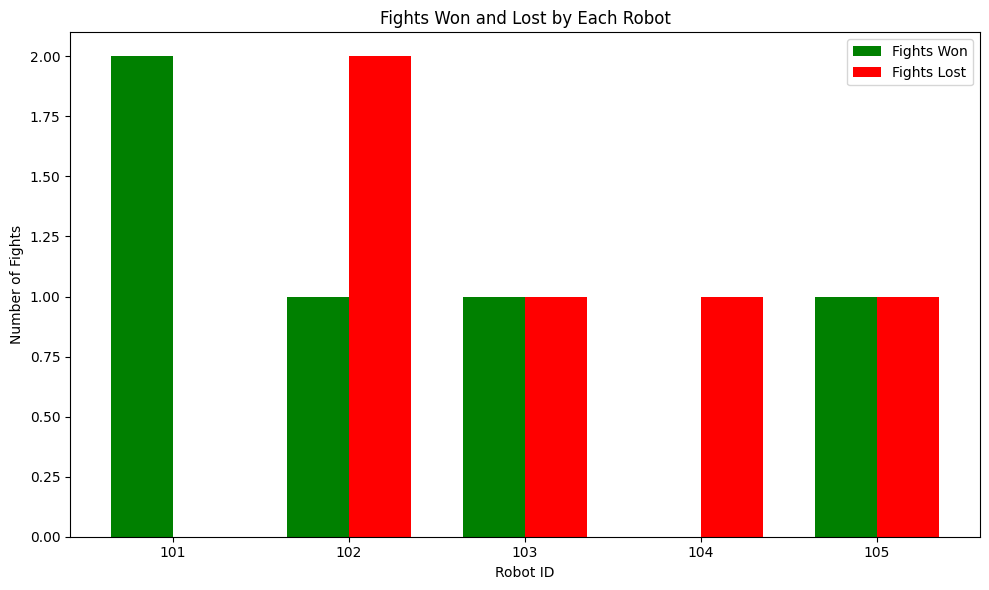

In [73]:
import matplotlib.pyplot as plt
# Create the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(win_loss_stats))

# Plot wins and losses side by side
plt.bar(x, win_loss_stats["fights_won"], width=bar_width, label="Fights Won", color="green")
plt.bar([i + bar_width for i in x], win_loss_stats["fights_lost"], width=bar_width, label="Fights Lost", color="red")

# Set x-ticks and labels
plt.xlabel("Robot ID")
plt.ylabel("Number of Fights")
plt.title("Fights Won and Lost by Each Robot")
plt.xticks([i + bar_width / 2 for i in x], win_loss_stats["robot_id"])
plt.legend()
plt.tight_layout()

plt.show()

In [74]:
# Making an API call
import requests

In [75]:
url = "https://api.worldbank.org/v2/region?format=json"
resp = requests.get(url) 
data = resp.json()


bank_df = pd.DataFrame(data[1], columns=["code", "name"])

In [76]:
bank_df

,code,name
0,AFE,Africa Eastern and Southern
1,AFR,Africa
2,AFW,Africa Western and Central
3,ARB,Arab World
4,CAA,Sub-Saharan Africa (IFC classification)
5,CEA,East Asia and the Pacific (IFC classification)
6,CEB,Central Europe and the Baltics
7,CEU,Europe and Central Asia (IFC classification)
8,CLA,Latin America and the Caribbean (IFC classific...
9,CME,Middle East and North Africa (IFC classification)
